<a href="https://colab.research.google.com/github/shipra-saxena/miniature-potato/blob/master/Shipra_saxena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Important liberary imports

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense , Activation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

Reading and understanding data

In [0]:
df=pd.read_csv('musk_csv.csv')

In [0]:
df.shape

In [0]:
df.columns

In [5]:
df.groupby('class').agg('count') #understanding class distribution of data


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,...,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581
1,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,...,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017


In [6]:
df.isna().count()   #looking for any missing value but no missing values found

ID                   6598
molecule_name        6598
conformation_name    6598
f1                   6598
f2                   6598
                     ... 
f163                 6598
f164                 6598
f165                 6598
f166                 6598
class                6598
Length: 170, dtype: int64

Removing unwanted columns

In [0]:
df=df.drop(['ID',	'molecule_name',	'conformation_name'	],axis=1)

In [8]:
df.shape

(6598, 167)

In [0]:
df.head

Dividing data in 80:20 train test split

In [0]:

train,test=train_test_split(df,test_size=0.2)

In [11]:
train.shape

(5278, 167)

Seperating labels from features

In [0]:
train_label=train['class']
test_label=test['class']

In [0]:
train=train.drop(['class'],axis=1)
test=test.drop(['class'],axis=1)

In [14]:
train.shape

(5278, 166)

Normalizing data i.e scale data in range of 0 to 1

In [0]:

train = pd.DataFrame(preprocessing.normalize(train, norm='l2'))
test=pd.DataFrame(preprocessing.normalize(test,norm='l2'))


In [16]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165
0,0.026757,-0.091473,0.020535,-0.060982,-0.072805,0.077161,-0.092095,0.034847,-0.142499,0.044803,-0.069071,-0.053515,0.001245,-0.042314,0.051026,-0.177968,-0.132543,-0.028002,-0.049159,0.117608,-0.102674,-0.112008,-0.137521,-0.041070,0.089606,-0.138143,0.027380,-0.099562,0.065338,0.079028,-0.072805,-0.057248,-0.010579,0.033602,-0.097696,0.090229,-0.046670,0.026757,-0.019912,0.059115,...,-0.001867,0.057248,-0.036714,-0.113875,-0.053515,-0.064093,-0.064716,-0.042314,-0.021157,0.034847,-0.035469,-0.028624,-0.138765,-0.112008,-0.118230,0.049159,-0.016801,-0.069071,-0.110763,-0.064716,-0.076539,0.055382,0.031736,0.052270,-0.062227,-0.070938,-0.069694,-0.025513,-0.026757,-0.030491,0.069071,0.002489,0.092718,-0.019912,0.091473,0.077783,0.098940,-0.041070,-0.090229,-0.003734
1,0.028842,-0.124983,-0.094859,-0.004487,-0.074990,-0.023715,0.135879,0.024356,0.008332,-0.077553,-0.032688,0.023074,-0.035252,-0.062812,-0.048070,-0.189717,-0.073067,-0.046147,0.030765,-0.050634,0.123701,0.083963,0.099986,-0.040379,-0.060889,0.058325,0.009614,0.046147,0.008973,-0.092295,-0.074349,-0.066657,-0.007050,-0.149338,0.041020,0.073708,0.087167,-0.064735,-0.087167,0.014101,...,-0.098063,-0.121778,-0.082040,0.071785,0.003205,0.049993,0.083963,0.003846,-0.049352,-0.103191,-0.057684,-0.112164,0.047429,0.041661,0.067298,-0.022433,0.110241,0.071144,-0.102550,-0.064735,-0.053839,-0.046147,-0.053839,0.020510,-0.003205,0.041020,0.003205,-0.108318,-0.024997,-0.125624,-0.152543,-0.171130,-0.132674,-0.017305,0.097422,0.078194,0.131392,-0.046788,-0.123060,0.001282
2,0.026910,-0.051429,-0.037675,-0.038871,-0.069369,0.035881,0.037077,0.020930,-0.007774,0.004784,-0.190765,-0.119004,-0.062193,-0.173422,-0.168040,-0.180001,-0.018538,-0.059801,-0.110632,-0.030498,-0.029302,-0.012558,-0.033488,0.112426,0.044253,0.008970,-0.015548,-0.016744,-0.036479,0.058605,-0.069967,-0.064585,-0.005382,0.001196,-0.091495,0.082525,-0.095083,0.036479,-0.010166,0.025116,...,-0.013156,0.045449,-0.060997,-0.112426,-0.053821,-0.073555,-0.040067,-0.097475,-0.132758,-0.011362,-0.000598,-0.012558,-0.031096,-0.022724,-0.061595,0.039469,0.016146,-0.008970,-0.105847,-0.060399,-0.066379,-0.016146,-0.023920,-0.004186,-0.055017,-0.074153,-0.066379,-0.053223,-0.019136,-0.062791,-0.141728,-0.178805,0.038273,-0.013156,0.090299,0.080133,0.091495,-0.038871,-0.083123,-0.000598
3,0.034752,-0.145807,-0.108034,0.114833,-0.067238,-0.018887,0.040796,-0.000755,-0.030219,-0.099723,0.006044,-0.044573,-0.048351,0.049862,0.037774,-0.211534,0.080081,-0.049862,0.011332,-0.008310,-0.046840,-0.007555,0.015110,-0.039285,-0.073281,-0.021909,0.032486,-0.049106,0.006799,-0.109544,-0.087636,-0.081592,0.005288,-0.171494,-0.010577,0.086125,-0.132209,0.000755,-0.083103,0.020398,...,-0.108034,-0.139764,-0.080836,-0.036263,-0.029464,-0.087636,-0.052128,-0.061949,0.029464,-0.016621,0.027197,-0.030219,-0.006799,-0.042307,-0.026442,0.000755,0.031730,0.021153,-0.134475,-0.077814,-0.088391,-0.056661,-0.065727,0.033241,-0.019642,-0.025686,0.027197,-0.127676,-0.025686,-0.148074,-0.176027,-0.216823,-0.160917,-0.015865,0.115588,0.092924,0.151096,-0.055150,-0.140519,0.004533
4,0.032436,-0.061129,0.001871,-0.069238,-0.072981,0.099179,-0.097931,0.044911,-0.146585,0.076100,-0.075476,-0.053020,-0.036178,-0.042416,-0.058634,-0.176526,-0.110407,-0.041169,-0.046782,0.070486,-0.112278,-0.112278,-0.136605,-0.037426,0.084208,-0.132239,-0.093565,-0.095436,0.059882,0.078595,-0.063624,0.085456,-0.074852,0.039297,-0.076723,0.046782,-0.053020,0.039921,-0.016842,0.021208,...,-0.003119,0.054268,-0.034931,-0.102921,0.025574,-0.000624,-0.076100,-0.046782,-0.026198,0.055515,0.029317,0.037426,-0.135357,-0.099803,-0.114149,0.034307,-0.051773,-0.061129,-0.111030,-0.064872,-0.071109,0.007485,-0.0

Deep learning solution Using MLPClassifier 

In [0]:
from sklearn.neural_network import MLPClassifier
num_epoch=10
train_score=[]
 
mlp = MLPClassifier(hidden_layer_sizes=(10,10),solver='sgd',
                      learning_rate_init=0.01,max_iter=500)

mlp.fit(train,train_label)
 

In [18]:
print(mlp.score(test,test_label))

0.990909090909091


Deep learning solution using Sequential MLP model of keras

In [0]:
model=Sequential()
model.add(Dense(20,input_dim=(166),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                3340      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 4,091
Trainable params: 4,091
Non-trainable params: 0
_________________________________________________________________


Training the model with 80% training and 20% validation

In [21]:
history=model.fit(train,train_label,epochs=25,batch_size=100,validation_split=0.2)




Train on 4222 samples, validate on 1056 samples
Epoch 1/25





4222/4222 [==============================] - 0s 84us/step - loss: 0.5024 - acc: 0.8451 - val_loss: 0.4075 - val_acc: 0.8494
Epoch 2/25
4222/4222 [==============================] - 0s 19us/step - loss: 0.3875 - acc: 0.8451 - val_loss: 0.3392 - val_acc: 0.8494
Epoch 3/25
4222/4222 [==============================] - 0s 19us/step - loss: 0.3284 - acc: 0.8451 - val_loss: 0.2980 - val_acc: 0.8494
Epoch 4/25
4222/4222 [==============================] - 0s 20us/step - loss: 0.2817 - acc: 0.8451 - val_loss: 0.2637 - val_acc: 0.8494
Epoch 5/25
4222/4222 [==============================] - 0s 20us/step - loss: 0.2552 - acc: 0.8837 - val_loss: 0.2438 - val_acc: 0.9195
Epoch 6/25
4222/4222 [==============================] - 0s 21us/step - loss: 0.2356 - acc: 0.9135 - val_loss: 0.2345 - val_acc: 0.9271
Epoch 7/25
4222/4222 [==============================] - 0s 21us/step - loss: 0.2238 - acc: 0.9235 - val_loss: 0.2257 - val_acc: 0.9347

In [35]:
history.history[accuracy]

KeyError: ignored

Plotting train validation loss

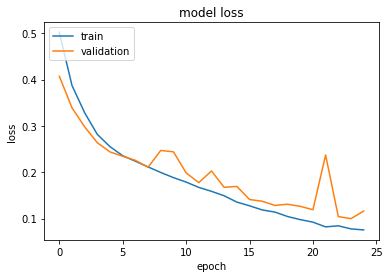

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

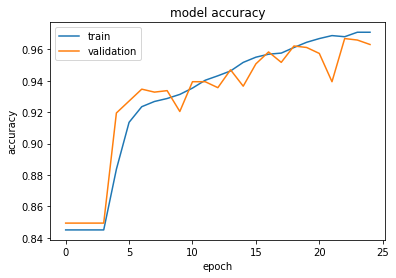

In [38]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Using trained model to predict test data

In [0]:


y_pred=model.predict_classes(test)
y_pred=y_pred[:,0]


calculating accuracy_score

In [24]:
accuracy = accuracy_score(test_label, y_pred)
print('Accuracy: %f' % accuracy)

Accuracy: 0.962121


calculating precision

In [25]:
precision = precision_score(test_label, y_pred)
print('Precision: %f' % precision)

Precision: 0.952941


calculating Recall

In [26]:
recall = recall_score(test_label, y_pred)
print('Recall: %f' % recall)

Recall: 0.794118


calculating f1 score

In [27]:
f1 = f1_score(test_label, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.866310


confusion matrix

In [28]:
matrix = confusion_matrix(test_label, y_pred)
print(matrix)

[[1108    8]
 [  42  162]]


saving the model in h5

In [0]:
model.save("model.h5")

In [33]:
score = model1.evaluate(test,test_label, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 96.06%
